In [2]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Problem 1.

In [3]:
close = pd.read_csv(r'DJIA.csv', index_col=0)
close.index = pd.to_datetime(close.index)
close.fillna(np.nan, inplace=True)
close[close.VALUE == '.'] = np.nan
close.VALUE = pd.to_numeric(close.VALUE)
pd.isnull(close).any()

VALUE    True
dtype: bool

### Problem 2.

In [4]:
pay = pd.read_csv(r'paychecks.csv', header=0)
periods = len(pay)
start = '3-12-2008'
fri3 = pd.date_range(start=start, periods=periods, freq='WOM-3FRI')
fri1 = pd.date_range(start=start, periods=periods, freq='WOM-1FRI')
paydays = fri3.union(fri1)[:periods]
pay.index = paydays

### Problem 3. 


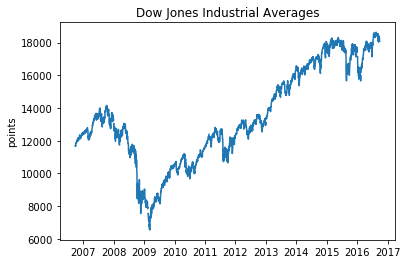

In [5]:
plt.figure()
plt.plot(close.VALUE, '-')
plt.title('Dow Jones Industrial Averages')
plt.ylabel('points')
plt.show()

### Problem 4.

In [6]:
fin = pd.read_csv(r'finances.csv')
num = len(fin)

In [7]:
quarters = pd.period_range(start='1978-09', periods=num, freq='3M')
fin.index=quarters
fin.head()

,EARNINGS,EXPENSES
1978-09,372572.16,122611.27
1978-12,419440.58,133176.18
1979-03,419766.49,154670.69
1979-06,361453.31,209360.42
1979-09,354463.33,174147.13


### Proboem 5.

In [8]:
traff = pd.read_csv(r'website_traffic.csv')

In [9]:
traff.head()

,IP,ENTER,LEAVE
0,187.162.243.198,2016-10-07 01:01:01,2016-10-07 01:04:57
1,119.200.107.183,2016-10-07 01:01:01,2016-10-07 01:03:47
2,170.158.132.203,2016-10-07 01:01:06,2016-10-07 01:03:09
3,24.169.81.199,2016-10-07 01:01:18,2016-10-07 01:09:36
4,186.129.160.43,2016-10-07 01:01:20,2016-10-07 01:08:32


In [10]:
traff.ENTER = pd.to_datetime(traff.ENTER)
traff.LEAVE = pd.to_datetime(traff.LEAVE)
dur = traff.LEAVE - traff.ENTER
dur.mean()

Timedelta('0 days 00:05:04.731647')

In [11]:
traff['visit'] = np.ones(len(traff))
traff.index= traff.ENTER
visit = traff.visit.resample('H').sum()

### Problem 6.


In [12]:
r = close - close.shift(1)
high = np.where(r == r.max())[0][0]
close.index[high]

Timestamp('2008-10-13 00:00:00')

In [13]:
low = np.where(r == r.min())[0][0]
close.index[low]

Timestamp('2008-09-29 00:00:00')

Since you did not specify if you want the largest monthly gain on average or the largest gain in terms of difference of the first annd the last price of the months I just calculate highest gain and loss with respect to on average monthly prices.

In [14]:
monthly_p = close.resample('M').mean()
monthly_r = monthly_p - monthly_p.shift(1)
high_m = np.where(monthly_r == monthly_r.max())[0][0]
low_m = np.where(monthly_r == monthly_r.min())[0][0]
print(close.index[high_m], close.index[low_m])

2007-03-06 00:00:00 2006-11-01 00:00:00


### Problem 7.

In [15]:
p30 = close.rolling(window=30, min_periods=20).mean()
p365 = close.rolling(window=365, min_periods=300).mean()
ew30 = close.VALUE.ewm(com=30).mean()
ew356 = close.VALUE.ewm(com=365).mean()

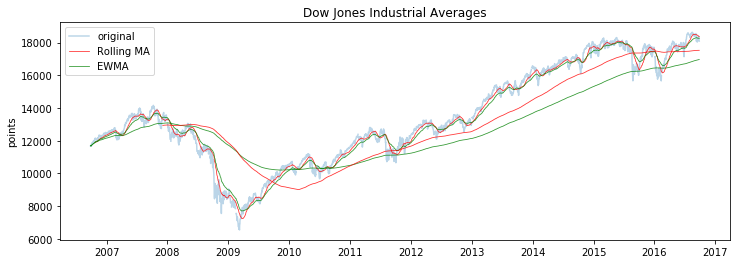

In [17]:
plt.figure(figsize=(12,4))
plt.plot(close.VALUE, '-', alpha=0.3, label='original')
plt.plot(p30, 'r-', alpha=0.8, lw=0.8, label='Rolling MA')
plt.plot(ew30, 'g-', alpha=0.8, lw=0.8, label='EWMA')
plt.title('Dow Jones Industrial Averages')
plt.ylabel('points')
plt.legend(
)
plt.plot(ew356, 'g-', alpha=0.8, lw=0.8)
plt.plot(p365, 'r-',alpha=0.8, lw=0.8)
plt.show()